In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
import timeit

In [246]:
loans_df = pd.read_csv('loans_full_schema.csv')
loans_df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


#question 1

Machine learning is a type of AI where we use existing data to develop predictive models. Although machine learning is very useful it's not a solution to every problem. We use machine learning when:
When you cannot code the rules: Many human tasks (such as recognizing whether an email is spam or not spam) cannot be adequately solved using a simple rule-based solution. A large number of factors could influence the answer. When rules depend on too many factors and many of these rules overlap, it can be difficult to write a program that can handle all the possible combinations. In such cases, ML can be used to learn the patterns in the data and make predictions based on those patterns.
When the problem involves prediction or classification: If you need to predict a continuous value (such as the price of a house) or classify data into different categories (such as whether a customer will buy a product or not), then ML can be used to build a model that can make those predictions or classifications.
When the problem involves large amounts of data: If you have a large amount of data that needs to be analyzed, then ML can be used to automatically find patterns and relationships in the data that might be difficult or impossible for humans to find.
When the problem involves complex relationships: If the problem involves complex relationships between variables, then ML can be used to learn those relationships and make predictions based on them.
Some problems tho machine learning is not the best solution:
When the problem is simple and can be solved using deterministic rules: If the problem can be solved using simple rules or computations, then ML may not be necessary.
When the data is not available or is of poor quality: ML requires large amounts of high-quality data to learn from. If the data is not available or is of poor quality, then ML may not be able to provide accurate predictions or classifications.
When the problem involves ethical or legal considerations: ML models can sometimes produce biased or unfair results, especially if the data used to train the model is biased. In such cases, it may be better to use deterministic rules or other methods that can ensure fairness and avoid discrimination.

#Question 2

In [247]:
from sklearn.preprocessing import LabelEncoder
class_labels = LabelEncoder()
loans_df['homeownership type'] = class_labels.fit_transform(loans_df['homeownership'].values)
loans_df.head()
loans_df= pd.get_dummies(loans_df, columns = ['homeownership'])
loans_df.head()
#changed the homepownership to one hot encoding to see the correlation between the different types of homeownership and 
#other features 

,emp_title,emp_length,state,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,...,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,homeownership type,homeownership_MORTGAGE,homeownership_OWN,homeownership_RENT
0,global config engineer,3.0,NJ,90000.0,Verified,18.01,NaN,NaN,NaN,0,...,Cash,27015.86,1999.33,984.14,1015.19,0.0,0,True,False,False
1,warehouse office clerk,10.0,HI,40000.0,Not Verified,5.04,NaN,NaN,NaN,0,...,Cash,4651.37,499.12,348.63,150.49,0.0,2,False,False,True
2,assembly,3.0,WI,40000.0,Source Verified,21.15,NaN,NaN,NaN,0,...,Cash,1824.63,281.80,175.37,106.43,0.0,2,False,False,True
3,customer service,1.0,PA,30000.0,Not Verified,10.16,NaN,NaN,NaN,0,...,Cash,18853.26,3312.89,2746.74,566.15,0.0,2,False,False,True
4,security supervisor,10.0,CA,35000.0,Verified,57.96,57000.0,Verified,37.66,0,...,Cash,21430.15,2324.65,1569.85,754.80,0.0,2,False,False,True


In [284]:
def eliminating_null_values(column):
    lonas_df = loans_df.dropna(subset=[column])
eliminating_null_values('loan_amount')
#i got rid of the null values in loan amounts

In [226]:
def standardizing(column):
    loans_df[column].astype('float')
standardizing('debt_to_income')
loans_df.head(30)
#some of the data are int while others are float so i standardized all the data to floats

,emp_title,emp_length,state,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,...,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,homeownership type,homeownership_MORTGAGE,homeownership_OWN,homeownership_RENT
0,global config engineer,3.0,NJ,90000.0,Verified,18.01,NaN,NaN,NaN,0,...,Cash,27015.86,1999.330000,984.14,1015.19,0.0,0,True,False,False
1,warehouse office clerk,10.0,HI,40000.0,Not Verified,5.04,NaN,NaN,NaN,0,...,Cash,4651.37,499.120000,348.63,150.49,0.0,2,False,False,True
2,assembly,3.0,WI,40000.0,Source Verified,21.15,NaN,NaN,NaN,0,...,Cash,1824.63,281.800000,175.37,106.43,0.0,2,False,False,True
3,customer service,1.0,PA,30000.0,Not Verified,10.16,NaN,NaN,NaN,0,...,Cash,18853.26,3312.890000,2746.74,566.15,0.0,2,False,False,True
4,security supervisor,10.0,CA,35000.0,Verified,57.96,57000.0,Verified,37.66,0,...,Cash,21430.15,2324.650000,1569.85,754.80,0.0,2,False,False,True
5,NaN,NaN,KY,34000.0,Not Verified,6.46,NaN,NaN,NaN,1,...,Cash,4256.71,873.130000,743.29,129.84,0.0,1,False,True,False
6,hr,10.0,MI,35000.0,Source Verified,23.66,155000.0,Not Verified,13.12,0,...,Cash,22560.00,2730.510000,1440.00,1290.51,0.0,0,True,False,False
7,police,10.0,AZ,110000.0,Source Verified,16.19,NaN,NaN,NaN,1,...,Cash,19005.39,1765.840000,994.61,771.23,0.0,0,True,False,False
8,parts,10.0,NV,65000.0,Source Verified,36.48,NaN,NaN,NaN,1,...,Cash,18156.66,2703.220000,1843.34,859.88,0.0,0,True,False,False
9,4th person,3.0,IL,30000.0,Not Verified,18.91,NaN,NaN,NaN,0,...,Cash,6077.13,391.150000,322.87,68.28,0.0,2,False,False,True


In [208]:
loans_df = pd.get_dummies(loans_df, columns = ['loan_status'])
loans_df.head()
#changed the loan status to one hot encoding to see the correlation between the different loan status and 
#other features 

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,paid_total,paid_principal,paid_interest,paid_late_fees,loan_status_Charged Off,loan_status_Current,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days)
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,1999.33,984.14,1015.19,0.0,False,True,False,False,False,False
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,499.12,348.63,150.49,0.0,False,True,False,False,False,False
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,281.80,175.37,106.43,0.0,False,True,False,False,False,False
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,3312.89,2746.74,566.15,0.0,False,True,False,False,False,False
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,2324.65,1569.85,754.80,0.0,False,True,False,False,False,False


#Question 3

<Axes: >

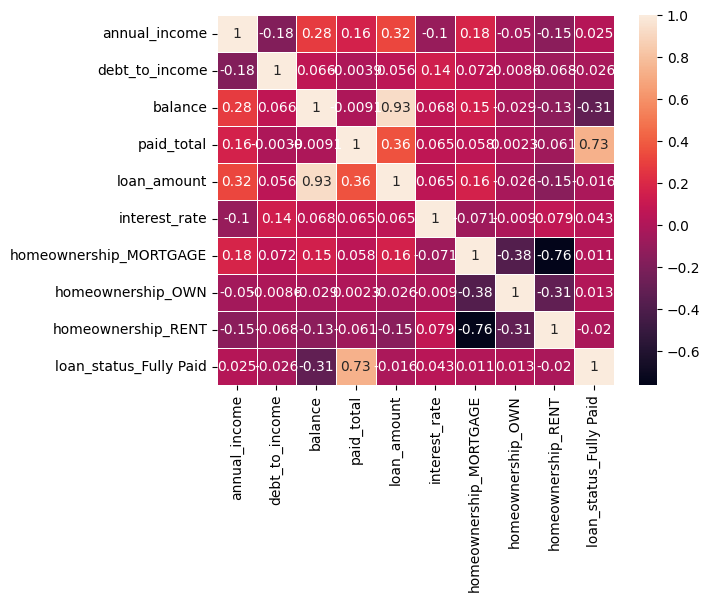

In [84]:
Correlation = loans_df[['annual_income','debt_to_income','balance','paid_total','loan_amount','interest_rate',
                        'homeownership_MORTGAGE','homeownership_OWN','homeownership_RENT','loan_status_Fully Paid']].corr()
                        
sns.heatmap(Correlation, annot=True,linewidths=0.5)
#most of the features are losely connected. the heatmap shows that the higher the income of a person the higher loan amoun they take out.

#Question 4

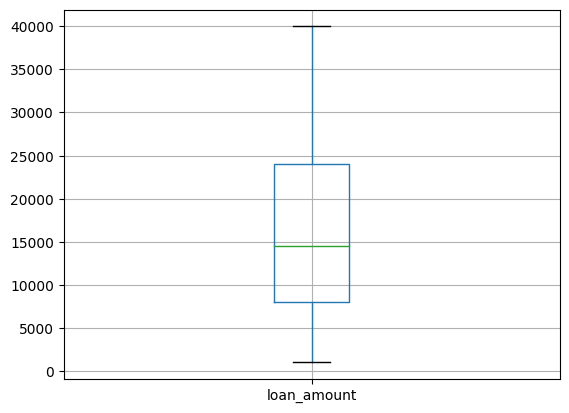

In [285]:
def boxplot(column):
    loans_df.boxplot(column=[column], )
boxplot('loan_amount')
#i eliminated the null values for more accurate plot. the box plot show that the median loan amount is just
#under 15000. the maximum loan anoumt is 40000 while the minimum loan amount is around 10000. the first quartile is 
#around 7000 while the 3rd quartile is around 240000.

#Question 5

In [253]:
loans_df['state']
starttime1 = timeit.default_timer()
def regions(state):
    Northeast = ['ME','NH','CT','MA','VT','NY','DE','NJ','MD','PA','DC','RI']
    Pacific = ['WA','OR','AK','CA','AZ','NV','UT','ID']
    Midwest = ['MN','MO','IL','OH','IN','WI','MI','IA']
    Plains = ['TX','OK','SD','ND','MT','WY','CO','NM','NE','KS']
    South = ['AR','LA','MS','AL','TN','KY','GA','FL','SC','NC','WV','VA']
    
    if state in Northeast:
        return 'Northeast'
    elif state in Pacific:
        return 'Pacific'
    elif state in Midwest:
        return 'Midwest'
    elif state in Plains:
        return 'Plains'
    elif state in South:
        return 'South'
    else:
        return 'other'

loans_df['Region'] = loans_df['state'].apply(lambda x: regions(x))
#loans_df.head(20)
endtime1 = timeit.default_timer()
time_for_approach1 = endtime1 - starttime1    
time_for_approach1    

0.01626145897898823

In [281]:
starttime2 = timeit.default_timer()
loans_df['Region'] = loans_df['state'].apply(lambda x: 'Pacific' if x in ['WA','OR','AK','CA','AZ','NV','UT','ID'] else
                                             'Plains' if x in ['TX','OK','SD','ND','MT','WY','CO','NM','NE','KS'] else
                                             'Midwest' if x in ['MN','MO','IL','OH','IN','WI','MI','IA'] else
                                             'Northeast' if x in ['ME','NH','CT','MA','VT','NY','DE','NJ','MD','PA','DC','RI'] else
                                             'South' if x in ['AR','LA','MS','AL','TN','KY','GA','FL','SC','NC','WV','VA'] else
                                             'Other')
endtime2 = timeit.default_timer()
time_for_approach2 = endtime2 - starttime2
print(time_for_approach1,   
      time_for_approach2)
if time_for_approach1>time_for_approach2:
    print('using and another lambda and another function is more performant')
elif time_for_approach1<time_for_approach2:
    print('using two lambda functionas is more performant')

0.01626145897898823 0.029220875003375113
using two lambda functionas is more performant


#Question 6

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

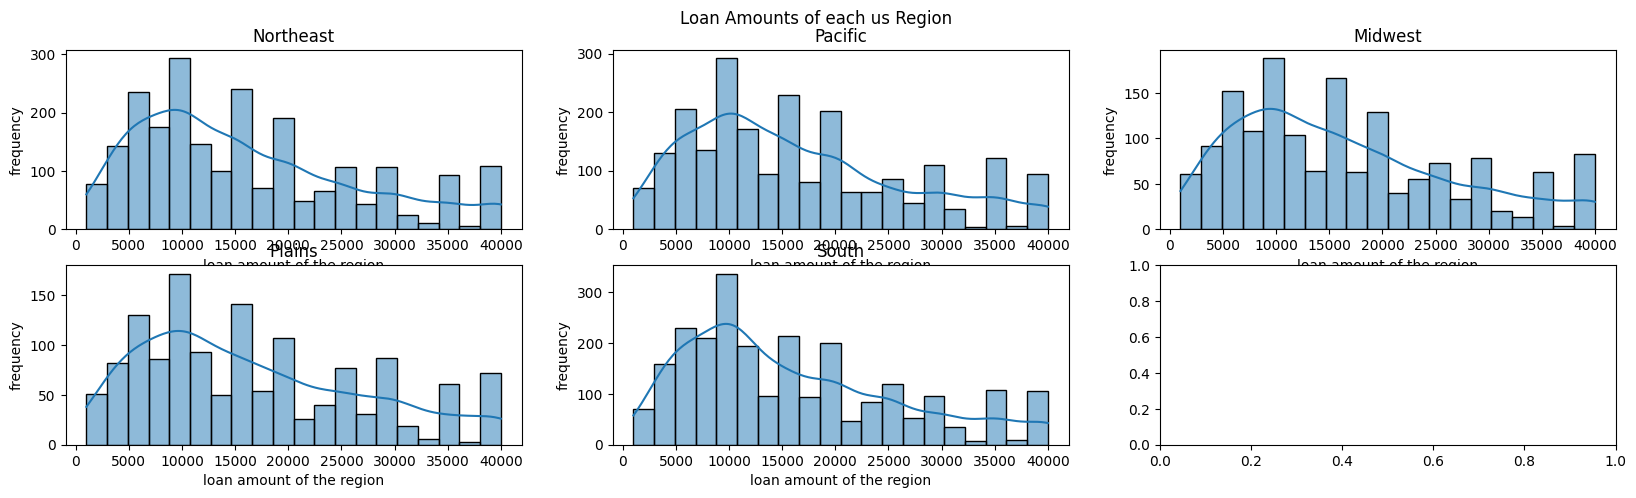

In [287]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 5))
fig.suptitle("Loan Amounts of each us Region", fontsize=12)
def plot_histogram():
    regions = ['Northeast','Pacific','Midwest','Plains','South']
    
    for i, region in enumerate(regions):
      rows, columns = divmod(i, 3)
      axis = axes[rows, columns]
      sns.histplot(loans_df[loans_df['Region'] == region]['loan_amount'], ax=axis, bins=20, kde=True)
      axis.set_title(region)
      axis.set_ylabel('frequency')
      axis.set_xlabel('loan amount of the region')
    plt.subplots_adjust(top=0.9)
    plt.show()  
plot_histogram()

the subplots shows that the loan amount varies by region with the mid west and south taking way less loans as the frequency never exceeds
150 in these regions. the pacific, northeast and south have pretty much similar graphs. showing that they have consistent loan amount taken across these regions 